In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from unidecode import unidecode
from scipy.optimize import curve_fit
from scipy import stats
from clean_module import *

In [2]:
def exponential_fit(x, a, b):
    return np.log(a)+x*np.log(1+b)


In [3]:
def exponential_fitting(x,y,new_x):
    log_y = np.log(y)
    fitting_parameters, covariance = curve_fit(exponential_fit,x,log_y,maxfev=10000)
    a,b=fitting_parameters
    new_log_y = exponential_fit(new_x,a,b)
    cat_x = np.append(x,new_x)
    cat_log_y = np.append(log_y,new_log_y)
    ix = cat_x.argsort()
    print(new_log_y)
    print(cat_x)
    print(cat_log_y)
    full_x = cat_x.take(ix)
    full_y = np.exp(cat_log_y.take(ix))
   
    return full_x,full_y,covariance




In [4]:
def format_total_pop_df(total_pop_df,pop_colname="poblacion_edad_voto",time_u_colname="anio"):
    total_pop_t_df = total_pop_df.transpose()
    return total_pop_t_df.rename({list(total_pop_t_df.columns)[0]:pop_colname},axis=1).reset_index().rename({"index":time_u_colname},axis=1)

In [5]:
def extrapolate_pop_in_vote_age(x_y_df,x_col,y_col,new_x):
    x = x_y_df.loc[:,x_col].values
    y = x_y_df.loc[:,y_col].values
    print(x.shape)
    print(y.shape)
    print(new_x.shape)
    full_x,full_y,_=exponential_fitting(x,y,new_x)
    return pd.DataFrame({x_col:full_x,y_col:full_y})
    
    

[6.89396315 8.08696768]
[0 1 2 3 4 5 6 8]
[3.40119738 3.91202301 4.38202663 5.07517382 5.70378247 6.3630281
 6.89396315 8.08696768]


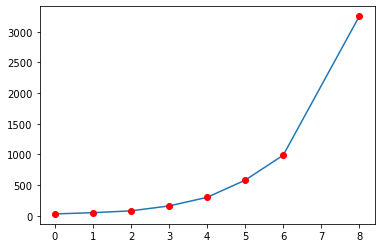

In [6]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([30, 50, 80, 160, 300, 580])
full_x, full_y, _ = exponential_fitting(x,y,np.array([6,8]))

plt.plot(np.append(x,[6,8]),full_y)
plt.plot(np.append(x,[6,8]),full_y, 'ro')
plt.show()


In [7]:
rel_path = '../Datasets/Bolivia/'
filename = 'proyeccion_poblacion_ine.xls'
sheet_names = ["Chuquisaca","La Paz","Cochabamba","Oruro","Potosí","Tarija","Santa Cruz","Beni","Pando"]
dfs_dict = {k:pd.read_excel(rel_path+filename,skiprows=2,sheet_name=k) for k in sheet_names}
dfs_dict["Chuquisaca"].head()


EDAD    2012    2013    2014    2015    2016    2017    2018    2019  \
0  Total  596470  601267  606132  611068  616073  621148  626318  631608   
1      0   14225   14159   14079   14005   13936   13869   13831   13826   
2      1   14355   14090   14035   13964   13898   13836   13775   13741   
3      2   14423   14286   14023   13973   13904   13842   13782   13721   
4      3   14441   14373   14241   13977   13929   13860   13799   13740   

     2020  
0  637013  
1   13817  
2   13742  
3   13687  
4   13678

In [8]:
def sum_pop_over_age_on_year(df,age,year):
    df.loc[:,"EDAD"] = df.loc[:,"EDAD"].replace({"80+":80,'80 o más':80})
    dep_df = df.drop(0)
    dep_df.loc[:,"EDAD"]=dep_df.loc[:,"EDAD"].astype(np.int64)
    dep_vote_age_df = dep_df[dep_df["EDAD"]>=age]
    return dep_vote_age_df[year].sum()

In [9]:
for key in dfs_dict.keys():
    dfs_dict[key].loc[:,"EDAD"] = dfs_dict[key].loc[:,"EDAD"].replace({"80+":80,'80 o más':80})
    dep_df = dfs_dict[key].drop(0)
    dep_df.loc[:,"EDAD"]=dep_df.loc[:,"EDAD"].astype(np.int64)
    dep_vote_age_df = dep_df[dep_df["EDAD"]>=18]
    dep_vote_age_df= dep_vote_age_df.sum()
    dep_vote_age_df
    total_dep_df = dfs_dict[key].iloc[0,:]
    total_dep_df
    print(dep_vote_age_df.values[1:]/total_dep_df[1:].values)



[0.5713765989907288 0.5753716734828288 0.5794463912151149
 0.5835717137863544 0.5879871378878802 0.59284421748118 0.5979582256936572
 0.6030924244151435 0.6081131782239922]
[0.622665023786333 0.6271261507426643 0.6313758175543106
 0.6353440180858867 0.63919253519754 0.6431100183615464 0.6470760820032918
 0.6510790376303444 0.6551156885762741]
[0.5975152956382118 0.6019970543666207 0.606257147402 0.6102737770706473
 0.6141616739428102 0.61806682930017 0.6220236842278787 0.6260969742486373
 0.6303255532403744]
[0.6054843280711579 0.6089085990893992 0.6123588394406352
 0.615843001994041 0.6194683026584867 0.6233337720205305 0.627461217876659
 0.6318985398672072 0.6366626989599286]
[0.5575987332691472 0.5600213571634315 0.5628247734138973
 0.5659333246465418 0.5696366064348249 0.5741491237732087
 0.5791546337621423 0.5843106389734211 0.5893606047329336]
[0.6152483677781131 0.6196038262007509 0.6234604811456103
 0.6267488269291696 0.6295654254193466 0.6321323953282867
 0.6345683439189693 0.

array([1710291.5       , 1819145.5       , 1950685.88888889,
       2150285.44444444, 2383472.18181818, 2484233.72727273,
       2618582.45454545])

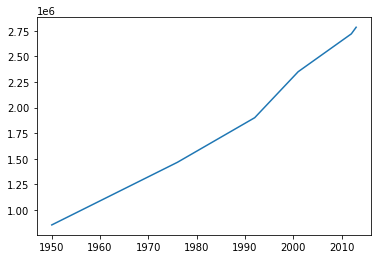

In [11]:
x= [1950,1976,1992,2001,2012,2013]
y = [854079,1465370,1900786,2349885,2719344,2783963]
plt.plot(x,y)
np.interp([1985,1989,1993,1997,2002,2005,2009],x,y)

In [12]:
for k in dfs_dict.keys():
    print(dfs_dict[k].columns)

Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')
Index(['EDAD', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='object')


In [13]:
total_population_dict = {k:v[v["EDAD"]=="Total"].drop("EDAD",axis=1) for (k,v) in dfs_dict.items()}

In [14]:
format_total_pop_df(total_population_dict["Chuquisaca"])

anio  poblacion_edad_voto
0  2012               596470
1  2013               601267
2  2014               606132
3  2015               611068
4  2016               616073
5  2017               621148
6  2018               626318
7  2019               631608
8  2020               637013

In [15]:
new_x= np.asarray([1985,1989,1993,1997,2001,2005,2009])
extrapolate_pop_in_vote_age(format_total_pop_df(total_population_dict["Chuquisaca"]),"anio","poblacion_edad_voto",new_x)

(9,)
(9,)
(7,)
[nan nan nan nan nan nan nan]
[2012 2013 2014 2015 2016 2017 2018 2019 2020 1985 1989 1993 1997 2001
 2005 2009]
[13.29878423 13.30679437 13.31485306 13.32296352 13.33112074 13.33932466
 13.34761351 13.35602423 13.36454534         nan         nan         nan
         nan         nan         nan         nan]


<ipython-input-2-1f89cdf2885a>:2: RuntimeWarning: invalid value encountered in log
  return np.log(a)+x*np.log(1+b)
/Users/adrianvillarroel/anaconda3/envs/bambootec/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


anio  poblacion_edad_voto
0   1985                  NaN
1   1989                  NaN
2   1993                  NaN
3   1997                  NaN
4   2001                  NaN
5   2005                  NaN
6   2009                  NaN
7   2012             596470.0
8   2013             601267.0
9   2014             606132.0
10  2015             611068.0
11  2016             616073.0
12  2017             621148.0
13  2018             626318.0
14  2019             631608.0
15  2020             637013.0

## Get projected population

In [16]:
frac_pop_vote_age_years = {1950:0.54469131,1976:0.52077494,1992:0.51682626,2001:0.54568657,2012:0.61982199}


In [17]:
pop_vote_age_per_dep_years = {"chuquisaca":{1950:260479,1976:358488,1992:453756,2001:531522,2012:581347},
                     "la paz" :{1950:854079,1976:1465370,1992:1900786,2001:2349885,2012:2719344},
                     "cochabamba": {1950:452145,1976:720831,1992:1110205,2001:1455711,2012:1762761},
                     "oruro":{1950:192356,1976:310409,1992:340114,2001:392451,2012:494587},
                     "potosi":{1950:509087,1976:657533,1992:645889,2001:709013,2012:828093},
                     "tarija":{1950:103441,1976:187204,1992:291407,2001:391226,2012:483518},
                     "santa cruz":{1950:244658,1976:710724,1992:1364389,2001:2029471,2012:2657762},
                     "beni":{1950:71636,1976:168367,1992:276174,2001:362521,2012:422008},
                     "pando":{1950:16284,1976:34493,1992:38072,2001:52525,2012:110436}
                    }

In [18]:
years_to_interp = [1985,1989,1993,1997,2002,2005,2009]

In [19]:
interp_frac_pop_vote_age_years = {k:np.interp(k,list(frac_pop_vote_age_years.keys()),list(frac_pop_vote_age_years.values())) for k in years_to_interp}
interp_frac_pop_vote_age_years

{1985: 0.5185538075,
 1989: 0.5175666375,
 1993: 0.5200329611111111,
 1997: 0.5328597655555556,
 2002: 0.5524261536363636,
 2005: 0.5726449045454546,
 2009: 0.5996032390909091}

In [20]:
interp_pop_vote_age_per_dep_years = {d:{k:int(np.round(np.interp(k,list(pop_vote_age_per_dep_years[d].keys()),list(pop_vote_age_per_dep_years[d].values())))*interp_frac_pop_vote_age_years[k] )for k in years_to_interp} for d in pop_vote_age_per_dep_years.keys()}
interp_pop_vote_age_per_dep_years 

{'chuquisaca': {1985: 213683,
  1989: 225603,
  1993: 240461,
  1997: 264809,
  2002: 296129,
  2005: 314748,
  2009: 340429},
 'la paz': {1985: 886878,
  1989: 941529,
  1993: 1014421,
  1997: 1145800,
  2002: 1316692,
  2005: 1422583,
  2009: 1570110},
 'cochabamba': {1985: 487364,
  1989: 536818,
  1993: 597307,
  1997: 693864,
  2002: 819593,
  2005: 897544,
  2009: 1006745},
 'oruro': {1985: 169628,
  1989: 173148,
  1993: 179894,
  1997: 196726,
  2002: 221929,
  2005: 246003,
  2009: 279854},
 'potosi': {1985: 337569,
  1989: 335420,
  1993: 339531,
  1997: 362855,
  2002: 397657,
  2005: 430809,
  2009: 477054},
 'tarija': {1985: 127469,
  1989: 140710,
  1993: 157308,
  1997: 184828,
  2002: 220758,
  2005: 243252,
  2009: 274826},
 'santa cruz': {1985: 559214,
  1989: 642728,
  1993: 747956,
  1997: 923914,
  2002: 1152685,
  2005: 1292997,
  2009: 1490859},
 'beni': {1985: 118752,
  1989: 132476,
  1993: 148608,
  1997: 172723,
  2002: 203253,
  2005: 219983,
  2009: 243309}

In [21]:
selected_years_ine = [2014,2019,2020]
agg_pop_vote_age_per_dep_years= {unidecode(d.lower()):{k:sum_pop_over_age_on_year(v,18,k) for k in selected_years_ine}  for (d,v) in dfs_dict.items()}
agg_pop_vote_age_per_dep_years

{'chuquisaca': {2014: 351221, 2019: 380918, 2020: 387376},
 'la paz': {2014: 1769569, 2019: 1891382, 2020: 1917521},
 'cochabamba': {2014: 1128133, 2019: 1252152, 2020: 1278703},
 'oruro': {2014: 314453, 2019: 344137, 2020: 350875},
 'potosi': {2014: 484367, 2019: 522646, 2020: 531341},
 'tarija': {2014: 326356, 2019: 365227, 2020: 373106},
 'santa cruz': {2014: 1741187, 2019: 2028600, 2020: 2086948},
 'beni': {2014: 246982, 2019: 277253, 2020: 283698},
 'pando': {2014: 69209, 2019: 88169, 2020: 92084}}

In [22]:
dict_merge = lambda a,b:a.update(b) or a
pop_vote_age_per_dep_years = {d:dict_merge(interp_pop_vote_age_per_dep_years[d],agg_pop_vote_age_per_dep_years[d]) for d in interp_pop_vote_age_per_dep_years.keys()}
pop_vote_age_per_dep_years

{'chuquisaca': {1985: 213683,
  1989: 225603,
  1993: 240461,
  1997: 264809,
  2002: 296129,
  2005: 314748,
  2009: 340429,
  2014: 351221,
  2019: 380918,
  2020: 387376},
 'la paz': {1985: 886878,
  1989: 941529,
  1993: 1014421,
  1997: 1145800,
  2002: 1316692,
  2005: 1422583,
  2009: 1570110,
  2014: 1769569,
  2019: 1891382,
  2020: 1917521},
 'cochabamba': {1985: 487364,
  1989: 536818,
  1993: 597307,
  1997: 693864,
  2002: 819593,
  2005: 897544,
  2009: 1006745,
  2014: 1128133,
  2019: 1252152,
  2020: 1278703},
 'oruro': {1985: 169628,
  1989: 173148,
  1993: 179894,
  1997: 196726,
  2002: 221929,
  2005: 246003,
  2009: 279854,
  2014: 314453,
  2019: 344137,
  2020: 350875},
 'potosi': {1985: 337569,
  1989: 335420,
  1993: 339531,
  1997: 362855,
  2002: 397657,
  2005: 430809,
  2009: 477054,
  2014: 484367,
  2019: 522646,
  2020: 531341},
 'tarija': {1985: 127469,
  1989: 140710,
  1993: 157308,
  1997: 184828,
  2002: 220758,
  2005: 243252,
  2009: 274826,
  20

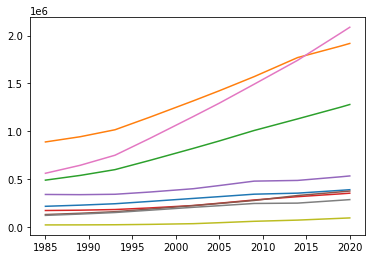

In [23]:
for d in pop_vote_age_per_dep_years.keys():
    plt.plot(np.asarray(list(pop_vote_age_per_dep_years[d].keys())),np.asarray(list(pop_vote_age_per_dep_years[d].values())))

In [24]:
pop_vote_age_per_dep_years_df = pd.DataFrame(pop_vote_age_per_dep_years).reset_index().rename({"index":"anio"},axis=1).melt(id_vars="anio",var_name="departamento",value_name="poblacion_edad_voto",value_vars = list(pop_vote_age_per_dep_years.keys()) )
pop_vote_age_per_dep_years_df

anio departamento  poblacion_edad_voto
0   1985   chuquisaca               213683
1   1989   chuquisaca               225603
2   1993   chuquisaca               240461
3   1997   chuquisaca               264809
4   2002   chuquisaca               296129
..   ...          ...                  ...
85  2005        pando                42137
86  2009        pando                56747
87  2014        pando                69209
88  2019        pando                88169
89  2020        pando                92084

[90 rows x 3 columns]

In [25]:
pop_vote_age_per_dep_years_df.to_csv("pop_vote_age_per_dep_years.csv",index=False)